In [2]:
## Load libraries

# Standard modules
import pandas as pd
import numpy as np
import os
import sys
from scipy import stats

# Data simulation module
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# Classifier modules
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits import mplot3d

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/EvenSem2024MAHE/'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'Data/'

In [ ]:
# Calculating the directed distance of samples
# from a hyperplane
# Samples along columns



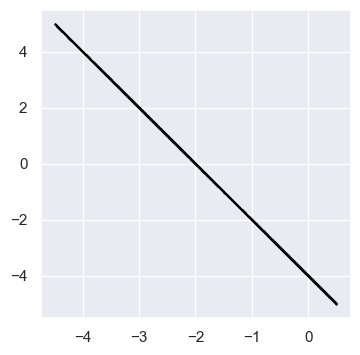

In [ ]:
# Plotting a straight line x2 = m*x1+b the linear algebra way:
# solve w^Tx+b = 0 and plot the resulting vectors' heads
m = -2 #slope
c = 4 #intercept

X = []
#Create values for the free variable x2
x2 = np.arange(-5 , 5, 0.01)
X = x2[:, np.newaxis] * np.array([1/m, 1]) + np.array([c/m, 0])
fig, ax = plt.subplots(figsize = (4,4))

ax.scatter(X[:, 0], X[:, 1], c = 'black', s = 0.2)

Text(0, 0.5, '$x_2$')

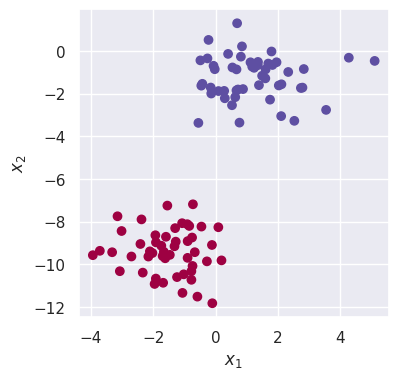

In [3]:
# Simulate linearly separable data and plot
X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, cluster_std=1.0, random_state=2)
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Spectral)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')


In [4]:
## Fit a linear support vector machine model (linear decision boundary)
model = SVC(kernel = 'linear', C = 1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
# Print the samples that are the support-vectors (special samples)
model.support_vectors_

array([[-0.72864791, -7.18926735],
       [-0.55342505, -3.37620408]])

In [8]:
# Weights for the two classes
print(model.coef_)
# Bias or intercept of the decision boundary line
print(model.intercept_)
# Decision boundary line's slope:


[[0.0240523  0.52340741]]
[2.78044136]


In [6]:
# User-defined function to plot the SVC decision boundary with margins
# for a two-dimensional SVC
def plot_svc_decision_function(model, ax = None, plot_margin = True, plot_support = True):
  if ax is None:
    ax = plt.gca()

  # Generate 2D grid of points with 1000 x 1000 points
  x1, x2 = np.mgrid[np.min(X[:, 0]) - 0.5:np.max(X[:, 0]) + 0.5:1000j,
                    np.min(X[:, 1]) - 0.5:np.max(X[:, 1]) + 0.5:1000j]

  ax.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
  ax.set_xlim(x1.min(), x1.max())
  ax.set_ylim(x2.min(), x2.max())
  #plt.title(' ')

  # Calculate category corresponding to each point on the grid
  category = model.predict(np.vstack([x1.flatten(), x2.flatten()]).T).reshape(x1.shape)
  ax.contourf(x1, x2, category, alpha = 0.3)

  # Plot margin
  if plot_margin:
    # Calculate score corresponding to each point on grid
    score = model.decision_function(np.vstack([x1.flatten(), x2.flatten()]).T).reshape(x1.shape)
    ax.contour(x1, x2, score, colors = 'k',
               levels = [-1, 0, 1],
               linestyles = ['--', '-', '--'])

  # Plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 150, linewidth = 1, facecolors = 'none', edgecolors = 'k')

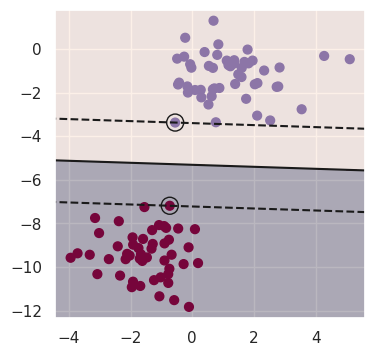

In [9]:
# Plot linear SVC decision boundary with margins
fig, ax = plt.subplots(figsize = (4,4))
plot_svc_decision_function(model, ax)